**Praktikum 1**

**OCR with Pytesseract and OpenCV**

Pada praktikum ini kita akan menerapkan teknik OCR dengan menggunakan tesseract dan openCV. Pytesseract or Python-tesseract merupakan alat OCR untuk Python yang juga berfungsi sebagai pembungkus untuk Mesin OCR Tesseract. Ia dapat membaca dan mengenali teks dalam gambar dan umumnya digunakan dalam kasus penggunaan ocr gambar ke teks menggunakan Python.

Selain itu juga berguna sebagai skrip panggilan mandiri untuk tesseract, karena dapat membaca semua jenis gambar yang didukung oleh perpustakaan gambar Pillow dan Leptonica, termasuk jpeg, png, gif, bmp, tiff, dan lainnya.

In [1]:
# Import library
import cv2  # Import library OpenCV untuk pemrosesan gambar
import numpy as np  # Import library NumPy untuk manipulasi array
import pytesseract  # Import library pytesseract untuk pengenalan teks pada gambar
from pytesseract import Output  # Import modul Output dari pytesseract untuk mengambil hasil ekstraksi teks
from matplotlib import pyplot as plt  # Import library matplotlib untuk menampilkan gambar secara visual

In [2]:
IMG_DIR = 'images/'  # Direktori tempat menyimpan gambar

In [3]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Mengubah gambar menjadi citra skala keabuan

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image, 5)  # Menghilangkan noise menggunakan median blur dengan kernel 5x5

# thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]  # Menggunakan metode thresholding Otsu

# dilation
def dilate(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.dilate(image, kernel, iterations=1)  # Proses dilasi dengan kernel 5x5

# erosion
def erode(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.erode(image, kernel, iterations=1)  # Proses erosi dengan kernel 5x5

# opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)  # Proses opening dengan kernel 5x5

# canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)  # Deteksi tepi menggunakan metode Canny

# skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated  # Koreksi kemiringan gambar

# template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)  # Pencocokan template menggunakan koefisien korelasi normalisasi

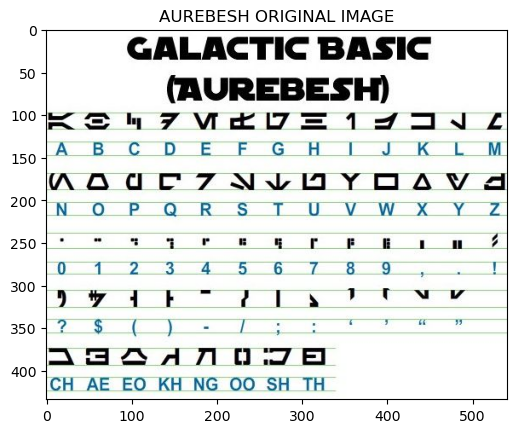

In [4]:
# Plot original image

# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'aurebesh.jpg')

# Memisahkan saluran warna (BGR) menjadi saluran biru, hijau, dan merah
b, g, r = cv2.split(image)

# Menggabungkan saluran warna kembali dalam urutan merah, hijau, biru untuk representasi RGB
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar menggunakan matplotlib
plt.imshow(rgb_img)
plt.title('AUREBESH ORIGINAL IMAGE')
plt.show()

In [5]:
# Preprocess image 

# Mengonversi gambar ke citra grayscale
gray = get_grayscale(image)

# Melakukan thresholding pada citra skala keabuan
thresh = thresholding(gray)

# Proses opening pada citra skala keabuan
opening_result = opening(gray)

# Deteksi tepi menggunakan metode Canny pada citra skala keabuan
canny_result = canny(gray)

# Menyimpan hasil preprocessing dalam dictionary
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening_result, 
          'canny': canny_result}

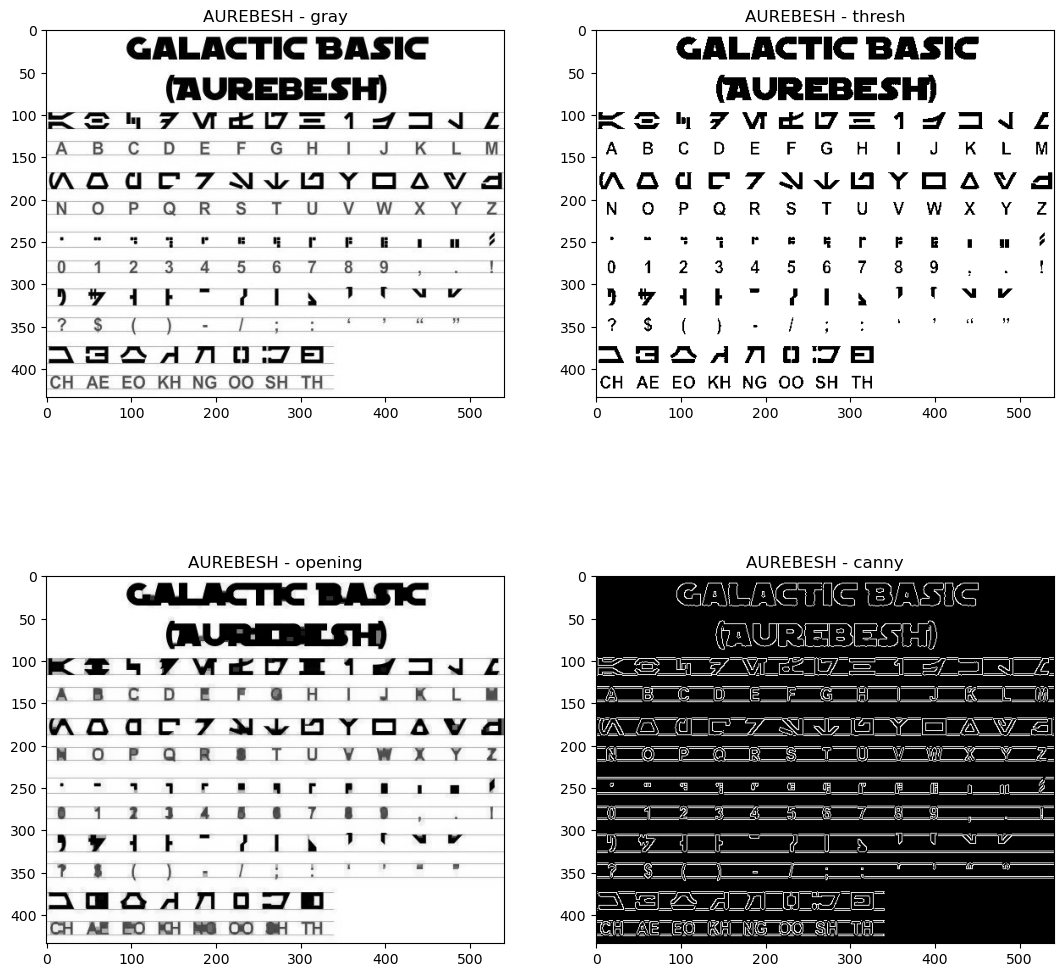

In [6]:
# Plot images after preprocessing

# Membuat objek figure dengan ukuran 13x13 inch
fig = plt.figure(figsize=(13, 13))

# Membuat array untuk menyimpan objek subplot
ax = []

# Menentukan jumlah baris dan kolom dalam subplot
rows = 2
columns = 2

# Mendapatkan daftar kunci (keys) dari dictionary images
keys = list(images.keys())

# Loop untuk membuat subplot
for i in range(rows * columns):
    ax.append(fig.add_subplot(rows, columns, i + 1))
    ax[-1].set_title('AUREBESH - ' + keys[i])  # Menambahkan judul subplot
    plt.imshow(images[keys[i]], cmap='gray')  # Menampilkan gambar dalam subplot

# Menampilkan plot hasil preprocessing
plt.show()

In [7]:
# Get OCR output using Pytesseract

# Konfigurasi kustom untuk Pytesseract
custom_config = r'--oem 3 --psm 6'

# OCR output untuk citra asli
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

# OCR output untuk citra hasil thresholding
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images['thresh'], config=custom_config))

# OCR output untuk citra hasil opening
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images['opening'], config=custom_config))

# OCR output untuk citra hasil deteksi tepi Canny
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images['canny'], config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)
RE TFVMVEVE ITZ IoIN.L
AB CUD ET FE GG mn Td KC
AOder7NvToYoAVaA
N_ Oo. 8 _ HG RS Ty wee Ve
a a F< 2
Sy a a a ay Se ae: |
i a a ey ee ee
2 a (a a eS
ASGaSANADI
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
GALACTIC BASIC
(AVREBESH)

RE 7FVMeEVEiefv ol Z
A B C DE F GH IJ K LM
AOdCerT7NVToOYOAVA
N O P Q@R $$ TU VW XK Y¥Y Z
"oe 3 3 rm 8 fo Pf F Bo a om %
0 12 3 4 5 6 7 89 , . !
a A
2 S$ ( Foe Fo gor ot toe
AadSANADIeE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREZEBELSH)
KEE VTMEUE iwoayvs
A BC D HE F @ H [| J K TL
AOadr7Wt HYOAVaA
WO P Q R 8S T U VW WK y Z
a J
S12 ya ib 8 7 Sb Ps,
7Vir- -yrp»ptTttYY
~ Et ys i eg Ee ee
AGMGoOAn